In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

**Risk Pricing and Competitive Strategy in Auto Insurance**

*Goals*
- The goal of this project is to analyze and model the strategic financial interactions between major insurance companies, using historical financial and operational data to simulate the effects of different premium and claims strategies and quantify potential payoffs
- Values not explicitly available in financial reports were approximated using probabilistic models, incorporating trend analysis and industry benchmarks from competitor data to ensure reliable estimations

In [2]:
data_1=pd.read_excel(r"data.csv/ICs_Financials_Comparison (version 1).xlsb.xlsx")
data_2=pd.read_excel(r"data.csv/ICs_Financials_Comparison (version 1).xlsb.xlsx", sheet_name='2022')

In [3]:
data_1

,Company,Premiums Earned,Premiums Written,Claims Incurred,Loss Ratio,Expense Ratio,Combined Ratio,Underwriting Profit or Loss,Reserves for Claims,Investment Income,Policies in Force,Avg Premium Per Policy,Lognormal Estimated # of Claims Using Severity Range 3-10,Claim Frequency
0,Progressive,58700000000,61600000000,45654600000,77.776150,11.530324,89.306474,6768300000,34389200000,1891800000,25494500,2302.457393,3878,0.000152
1,Geico,39264000000,39837000000,35629000000,90.742156,9.257844,100.000000,3635000000,12608000000,2400000000,17000000,2309.647059,2590,0.000152
2,State Farm,57187000000,59190000000,48437000000,84.699320,17.145505,101.844825,9805000000,30090000000,4558000000,24026700,2380.143757,3653,0.000152
3,Allstate,48427000000,50347000000,44498300000,88.383220,4.337895,92.721115,2184000000,31462000000,2480000000,20326000,2382.515005,3089,0.000152


In [4]:
data_2

,Company,Premiums Earned,Premiums Written,Claims Incurred,Loss Ratio,Expense Ratio,Combined Ratio,Underwriting Profit or Loss,Reserves for Claims,Investment Income,Policies in Force,Avg Premium Per Policy,Lognormal Estimated # of Claims Using Severity Range 3-10,Claim Frequency
0,Progressive,49200000000,51100000000,38122700000,77.485163,6.084756,83.569919,2.993700e+09,3.035930e+10,1260300000,23445400,2098.492668,3562,0.000152
1,Geico,38984000000,39107000000,36297000000,93.107429,11.715063,104.822491,4.567000e+09,1.179400e+10,1900000000,16979000,2296.012722,2580,0.000152
2,State Farm,46592000000,59190000000,43752000000,93.904533,28.545673,122.450206,1.330000e+10,2.453800e+10,3475000000,24026700,1939.176000,3653,0.000152
3,Allstate,43909000000,45787000000,40453000000,88.350405,15.186771,103.537176,6.953567e+09,2.223043e+10,2405000000,21658000,2027.380183,3292,0.000152


In [5]:
data_1['Year']= 2023
data_2['Year']= 2022
dfs = [data_1 , data_2]
df1 = pd.concat(dfs)

In [6]:
df1

,Company,Premiums Earned,Premiums Written,Claims Incurred,Loss Ratio,Expense Ratio,Combined Ratio,Underwriting Profit or Loss,Reserves for Claims,Investment Income,Policies in Force,Avg Premium Per Policy,Lognormal Estimated # of Claims Using Severity Range 3-10,Claim Frequency,Year
0,Progressive,58700000000,61600000000,45654600000,77.776150,11.530324,89.306474,6.768300e+09,3.438920e+10,1891800000,25494500,2302.457393,3878,0.000152,2023
1,Geico,39264000000,39837000000,35629000000,90.742156,9.257844,100.000000,3.635000e+09,1.260800e+10,2400000000,17000000,2309.647059,2590,0.000152,2023
2,State Farm,57187000000,59190000000,48437000000,84.699320,17.145505,101.844825,9.805000e+09,3.009000e+10,4558000000,24026700,2380.143757,3653,0.000152,2023
3,Allstate,48427000000,50347000000,44498300000,88.383220,4.337895,92.721115,2.184000e+09,3.146200e+10,2480000000,20326000,2382.515005,3089,0.000152,2023
0,Progressive,49200000000,51100000000,38122700000,77.485163,6.084756,83.569919,2.993700e+09,3.035930e+10,1260300000,23445400,2098.492668,3562,0.000152,2022
1,Geico,38984000000,39107000000,36297000000,93.107429,11.715063,104.822491,4.567000e+09,1.179400e+10,1900000000,16979000,2296.012722,2580,0.000152,2022
2,State Farm,46592000000,59190000000,43752000000,93.904533,28.545673,122.450206,1.330000e+10,2.453800e+10,3475000000,24026700,1939.176000,3653,0.000152,2022
3,Allstate,43909000000,45787000000,40453000000,88.350405,15.186771,103.537176,6.953567e+09,2.223043e+10,2405000000,21658000,2027.380183,3292,0.000152,2022


**Underwriting Profits Baseline Scenario**
- The first sensitivity analysis focuses on underwriting profit, a critical indicator of a company's financial health and ability to manage risk effectively.
- A company with a strong underwriting profit can afford to take on more risk, reinvest in the business, reward long-term stakeholders, and maintain a cushion for future claims.
- In this baseline scenario, we will use key metrics related to underwriting profit to assess a company’s financial stability and its capacity to manage resources efficiently while planning for future growth.

In [7]:
df1['Underwriting Profit or Loss']

0    6.768300e+09
1    3.635000e+09
2    9.805000e+09
3    2.184000e+09
0    2.993700e+09
1    4.567000e+09
2    1.330000e+10
3    6.953567e+09
Name: Underwriting Profit or Loss, dtype: float64

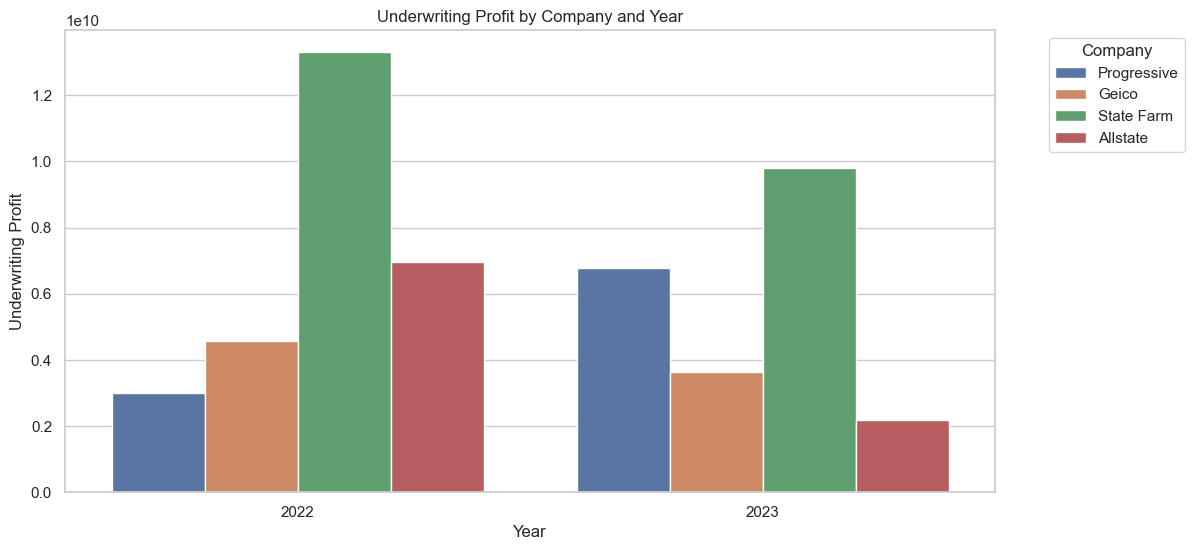

In [8]:
df_melted = pd.melt(df1, id_vars=['Company', 'Year'], value_vars=['Underwriting Profit or Loss'])
df_melted = df_melted[df_melted['variable'] == 'Underwriting Profit or Loss']

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x="Year", y="value", hue="Company", data=df_melted, errorbar=None)

plt.xlabel('Year')
plt.ylabel('Underwriting Profit')
plt.title('Underwriting Profit by Company and Year')
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




In [9]:
df1 = df1.sort_values(by=['Company', 'Year'])
df1['Previous_Year_Underwriting_Profit'] = df1.groupby('Company')['Underwriting Profit or Loss'].shift(1)
df1['Underwriting Profit Percent Change'] = abs((df1['Underwriting Profit or Loss'] - df1['Previous_Year_Underwriting_Profit']) / df1['Previous_Year_Underwriting_Profit']) * 100
df1.drop(columns=['Previous_Year_Underwriting_Profit'], inplace=True)

df1['Underwriting Profit Percent Change'] = df1['Underwriting Profit Percent Change'].bfill()
print(df1[['Company', 'Year', 'Underwriting Profit or Loss', 'Underwriting Profit Percent Change']])

       Company  Year  Underwriting Profit or Loss  \
3     Allstate  2022                 6.953567e+09   
3     Allstate  2023                 2.184000e+09   
1        Geico  2022                 4.567000e+09   
1        Geico  2023                 3.635000e+09   
0  Progressive  2022                 2.993700e+09   
0  Progressive  2023                 6.768300e+09   
2   State Farm  2022                 1.330000e+10   
2   State Farm  2023                 9.805000e+09   

   Underwriting Profit Percent Change  
3                           68.591658  
3                           68.591658  
1                           20.407270  
1                           20.407270  
0                          126.084778  
0                          126.084778  
2                           26.278195  
2                           26.278195  


- Within the past 2 years, Progressive boasts an approximate 26% increase in their underwriting profits while State Farm, Geico and Allstate have all shown underwriting losses.
- Let's explore some reasons as to why this might be

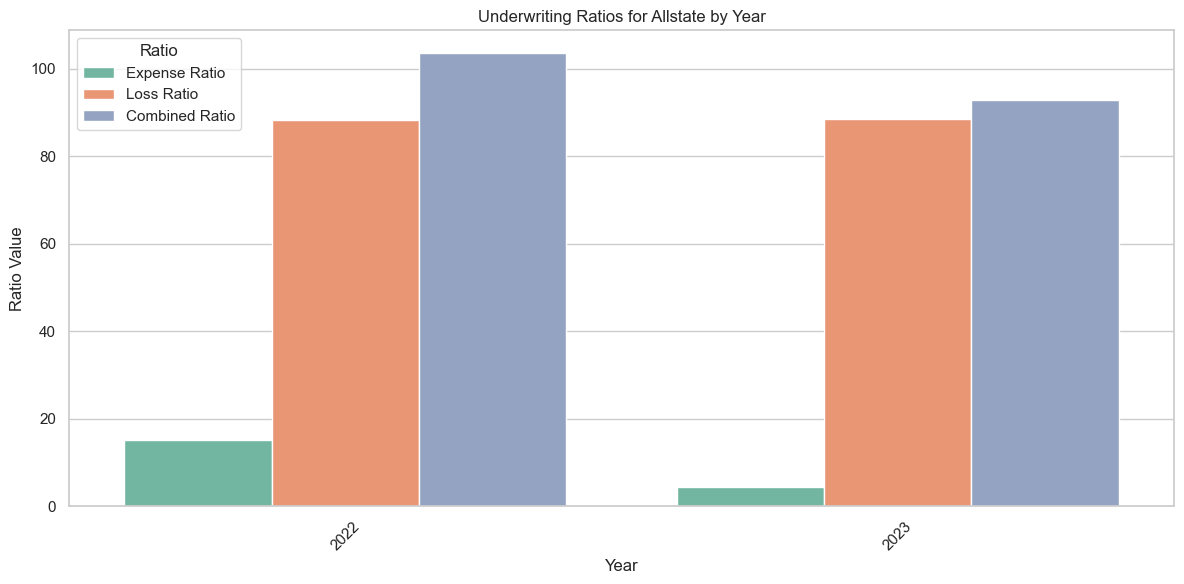

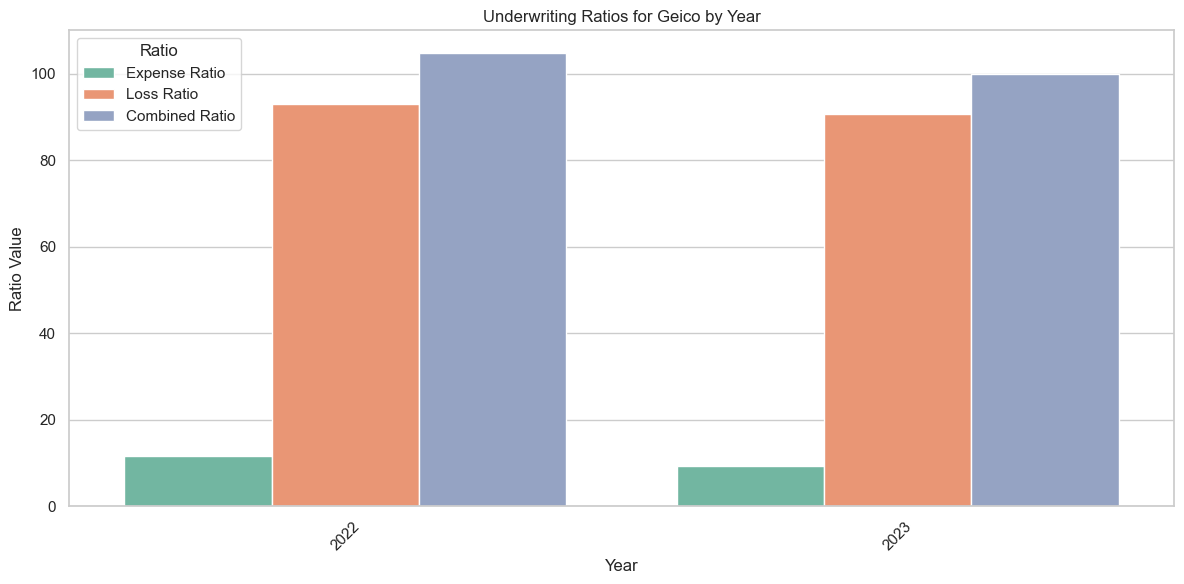

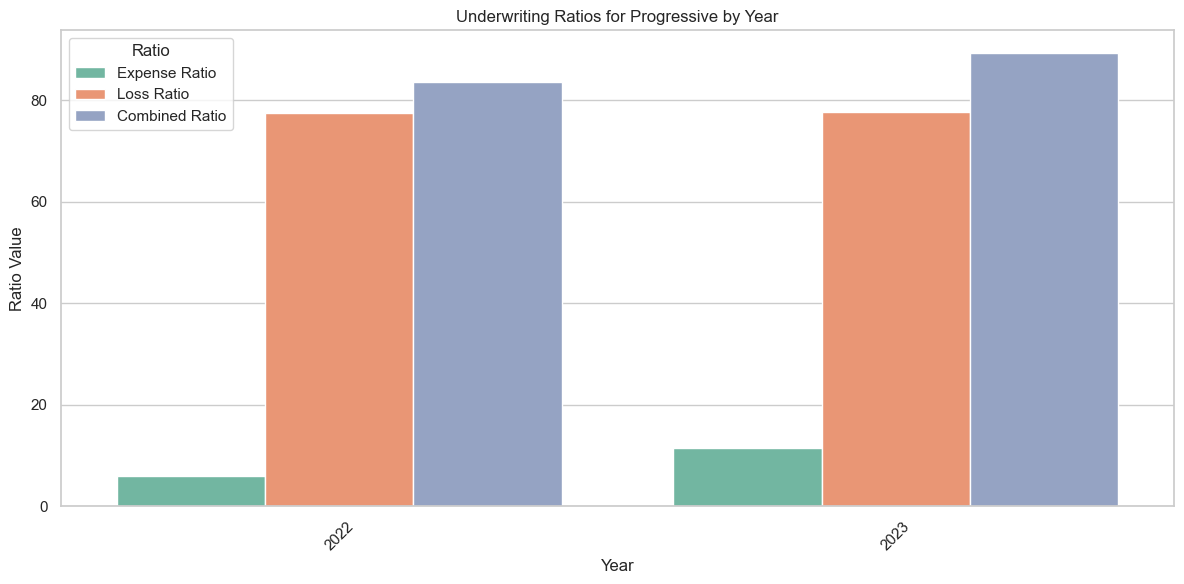

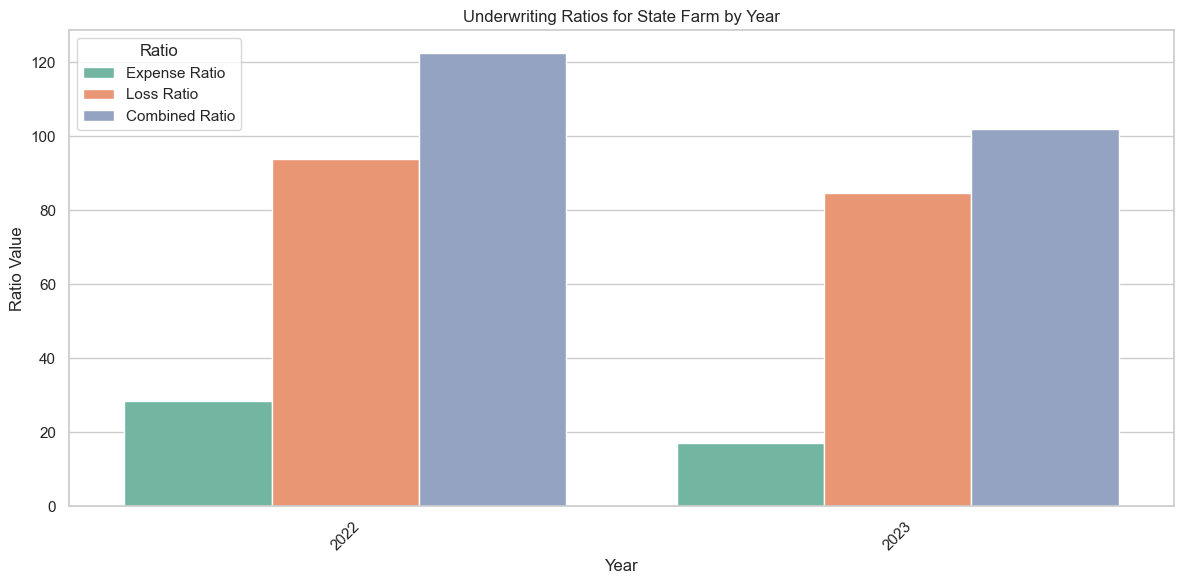

In [10]:
df_melted1 = pd.melt(df1, id_vars=['Company', 'Year'], value_vars=['Expense Ratio', 'Loss Ratio', 'Combined Ratio'])
sns.set(style="whitegrid")
hue_order = ['Expense Ratio', 'Loss Ratio', 'Combined Ratio']
year_order = sorted(df_melted1['Year'].unique())  

for company in df_melted1['Company'].unique():
    df_company = df_melted1[df_melted1['Company'] == company]
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x="Year", y="value", hue="variable", data=df_company, hue_order=hue_order, order=year_order, palette="Set2", dodge=True)
    ax.set_xlabel("Year")
    ax.set_ylabel("Ratio Value")
    ax.set_title(f"Underwriting Ratios for {company} by Year")
    ax.set_xticks(range(len(year_order)))  
    ax.set_xticklabels(year_order, rotation=45) 

    ax.legend(title="Ratio")
    
    plt.tight_layout()
    
    plt.show()


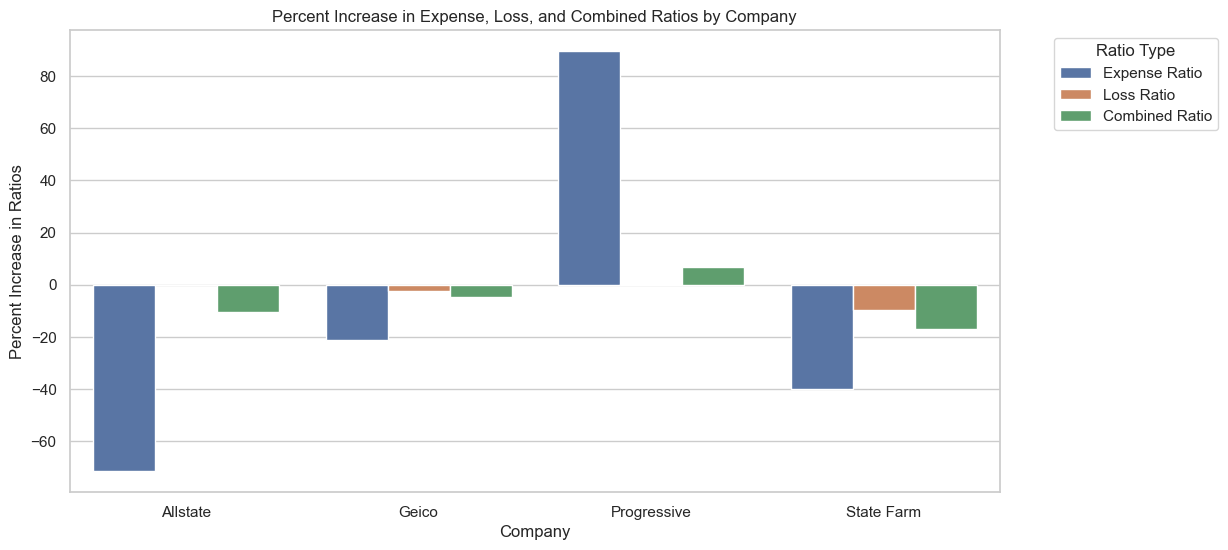

In [11]:
df_melted1 = pd.melt(df1, id_vars=['Company', 'Year'], value_vars=['Expense Ratio', 'Loss Ratio', 'Combined Ratio'])
df_melted1['Percent Increase ELR'] = df_melted1.groupby(['Company', 'variable'])['value'].pct_change() * 100
df_melted1['Percent Increase ELR 2'] = df_melted1.groupby(['Company', 'variable'])['Percent Increase ELR'].bfill()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="Company", y="Percent Increase ELR", hue="variable", data=df_melted1, errorbar=None)
plt.xlabel('Company')
plt.ylabel('Percent Increase in Ratios')
plt.title('Percent Increase in Expense, Loss, and Combined Ratios by Company')

plt.legend(title="Ratio Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


**Results**
- The first reason for why Progressive's underwriting succeeds and Allstate, Geico and State Farm's underwriting falls behind stems from the Loss and Expense Ratios. Progressive has had a significant increase in its expense ratio which, when countered with its low loss ratio, still leaves the combined ratio at a much better standing than the competition's.
- Despite expected relatively high loss ratios for each company, as well as State Farm and Geico even decreasing their loss ratio from the previous year, Progressive has been the sole company of these giants to produce a positive percent increase in expense ratio whilst keeping the ratio itself to under 100, hence leading to underwriting profits. 


**Investment Income Baseline Scenario**
- Next we will analyze investment income, a strong indicator of how well each company is managing their assets and how successful they are at gaining a profit from successful investments.
- This income is used to provide shareholders better returns and/or higher dividends, as well as for reinvestment back into the company to offset underwriting losses
-  Companies can also use values derived from underwriting profits and investment income as a baseline for determining an optimal business strategy:
  * lower premiums with the intended outcome of average customer retention and prioritizing high investment income
  * higher premiums with the intended outcome of prioritized high customer retention and lower investment income  

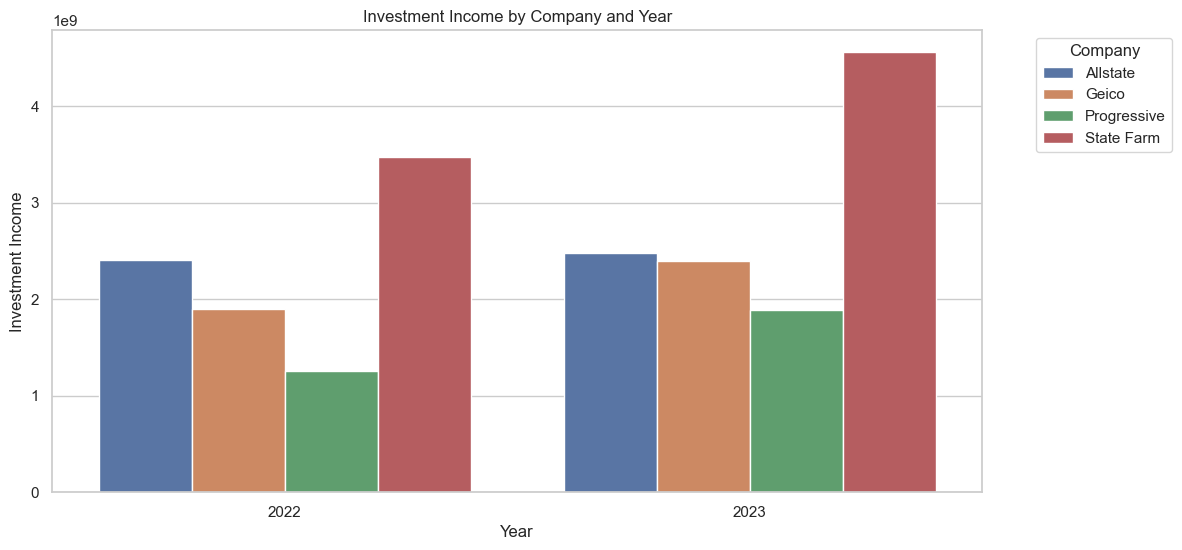

In [12]:
df2_melted = pd.melt(df1, id_vars=['Company', 'Year'], value_vars=['Investment Income'])
df2_melted = df2_melted[df2_melted['variable'] == 'Investment Income']

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x="Year", y="value", hue="Company", data=df2_melted, errorbar=None)

plt.xlabel('Year')
plt.ylabel('Investment Income')
plt.title('Investment Income by Company and Year')
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



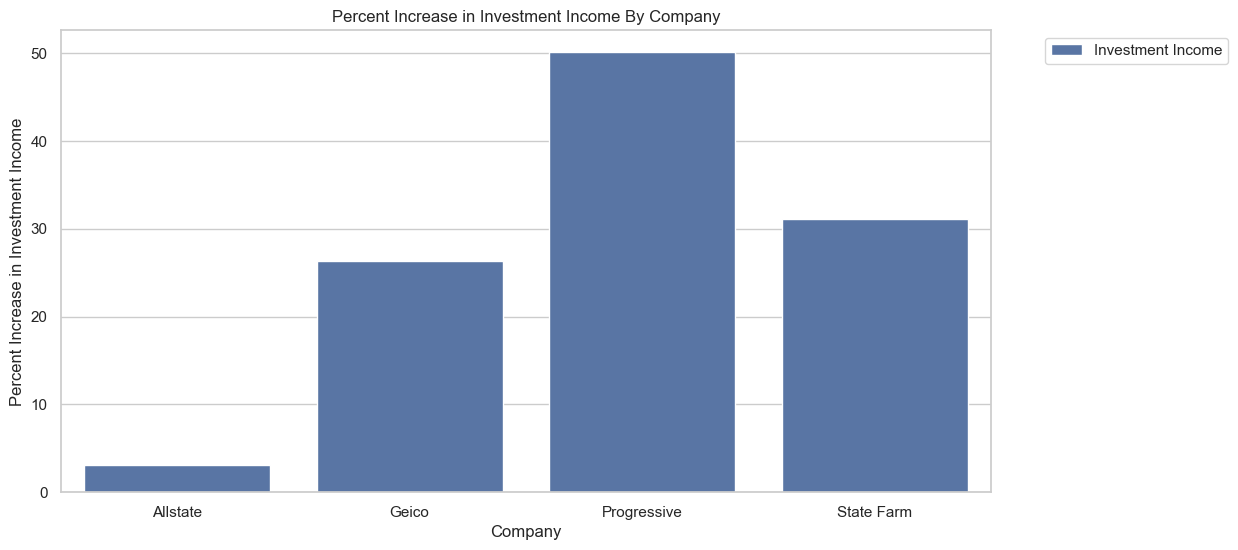

In [13]:
df_melted2 = pd.melt(df1, id_vars=['Company', 'Year'], value_vars=['Investment Income'])
df_melted2['Percent Increase II 1'] = df_melted2.groupby(['Company', 'variable'])['value'].pct_change() * 100
df_melted2['Percent Increase II 2'] = df_melted2.groupby(['Company', 'variable'])['Percent Increase II 1'].bfill()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="Company", y="Percent Increase II 1", hue="variable", data=df_melted2, errorbar=None)
plt.xlabel('Company')
plt.ylabel('Percent Increase in Investment Income')
plt.title('Percent Increase in Investment Income By Company')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

* While Progressive has also shown success in the underwriting sector, their investment income pales in comparison to State Farm's
* This is due to State Farm's mutual company structure; State Farm is owned by policyholders rather than shareholders, which allows them to create a more diversified and patient portfolio with profitable long term investments.
* However, when looking at percent increases for each company, Progressive has shown the most increase in the past year of investment income: a tribute to their very successful marketing and financial management

**Policies In Force Baseline Scenario**
- PIF is a key indicator of market share, and a company with a large number of policies has greater market leverage 
- If a company has a strong market share, it may have more pricing flexibility to offer competitive premiums while still maintaining profitability

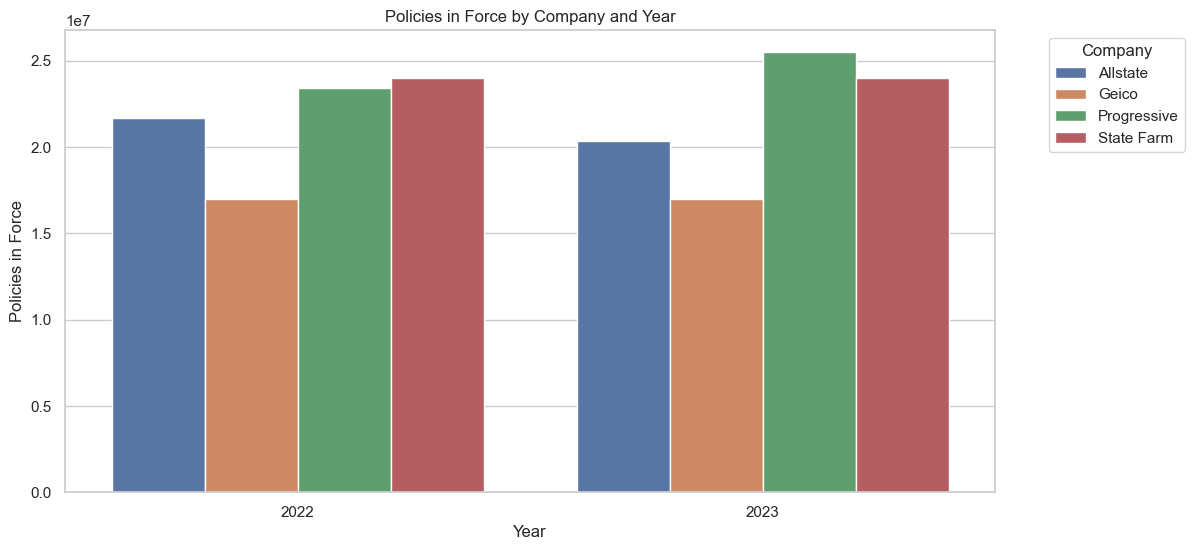

In [14]:
df3_melted = pd.melt(df1, id_vars=['Company', 'Year'], value_vars=['Policies in Force'])
df3_melted = df3_melted[df3_melted['variable'] == 'Policies in Force']

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x="Year", y="value", hue="Company", data=df3_melted, errorbar=None)

plt.xlabel('Year')
plt.ylabel('Policies in Force')
plt.title('Policies in Force by Company and Year')
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

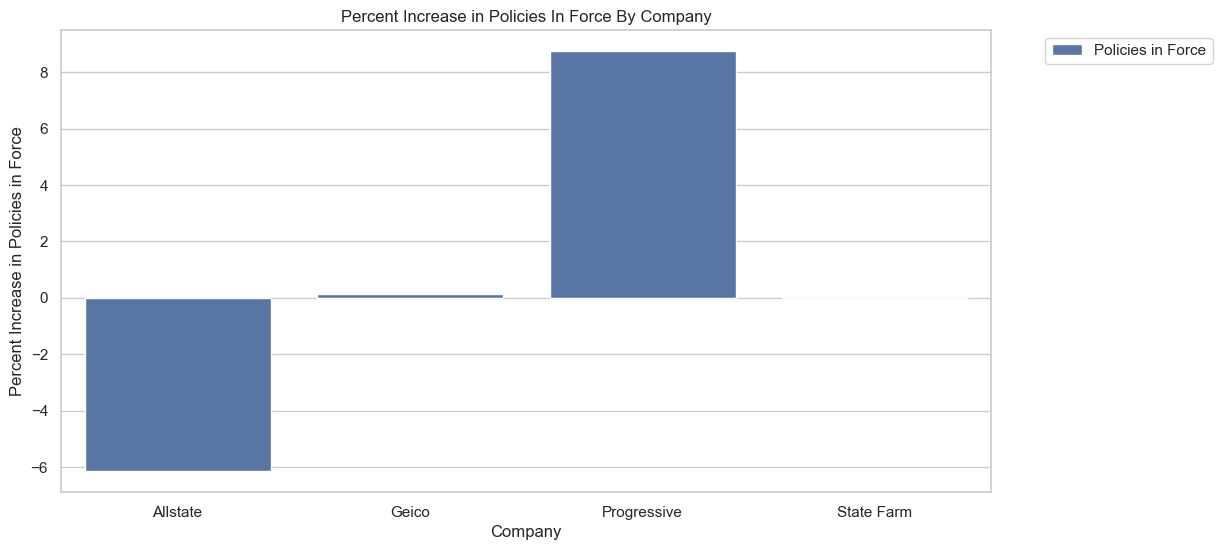

In [15]:
df_melted3 = pd.melt(df1, id_vars=['Company', 'Year'], value_vars=['Policies in Force'])
df_melted3['Percent Increase PIF 1'] = df_melted3.groupby(['Company', 'variable'])['value'].pct_change() * 100
df_melted3['Percent Increase PIF 2'] = df_melted3.groupby(['Company', 'variable'])['Percent Increase PIF 1'].bfill()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="Company", y="Percent Increase PIF 1", hue="variable", data=df_melted3, errorbar=None)
plt.xlabel('Company')
plt.ylabel('Percent Increase in Policies in Force')
plt.title('Percent Increase in Policies In Force By Company')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [16]:
print(df_melted2[['Company', 'Year', 'value', 'Percent Increase II 1']])

       Company  Year       value  Percent Increase II 1
0     Allstate  2022  2405000000                    NaN
1     Allstate  2023  2480000000               3.118503
2        Geico  2022  1900000000                    NaN
3        Geico  2023  2400000000              26.315789
4  Progressive  2022  1260300000                    NaN
5  Progressive  2023  1891800000              50.107117
6   State Farm  2022  3475000000                    NaN
7   State Farm  2023  4558000000              31.165468


**Results**
- Progressive dominates the field of policies in force and, when given the data above, this seems rather shocking considering that the claims incurred by Progressive is relatively similar to that of Geico and State Farm and the increase in claims incurred, if anything, should only hinder Progressive in this field
- Progressive's underwriting profits have certainly benefitted them in this regard as they seem to reinvest this money into profitable marketing schemes which combat consumer attrition
- Although this is not represented in the data above, the aforementioned conclusion can be inferred due to the stark contrast in percent increase between Progressive and its competitors

**Reserves for Claims Baseline Scenario**
- Reserves for claims function as a financial safety net, ensuring that an insurer can meet its obligations to policyholders without overly relying on fluctuating underwriting profits
- By maintaining healthy reserves, a company is better equipped to absorb shocks from unexpected losses and smooth out financial volatility

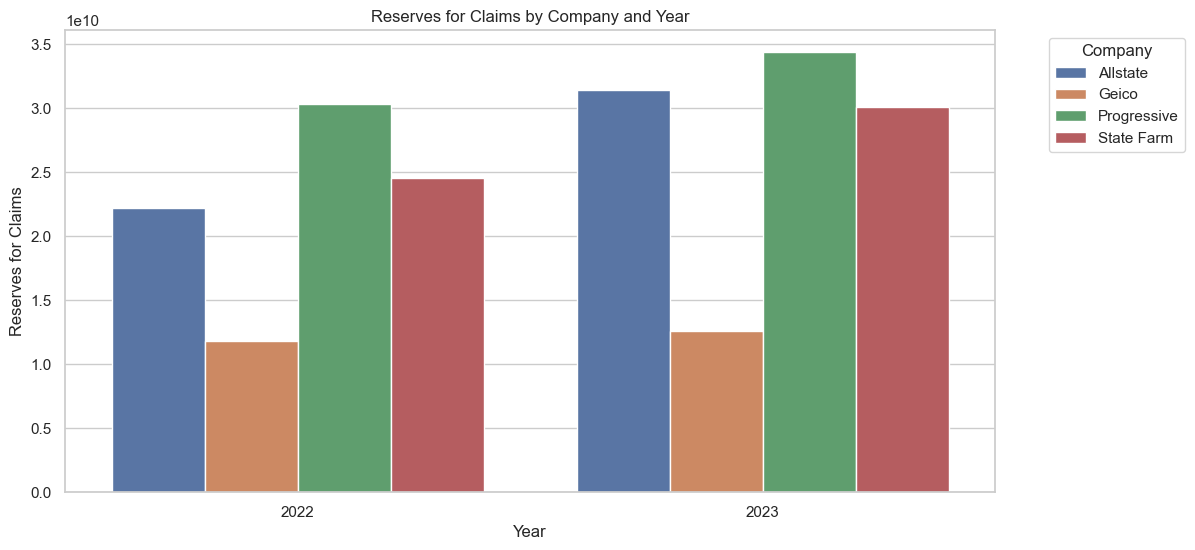

In [17]:
df4_melted = pd.melt(df1, id_vars=['Company', 'Year'], value_vars=['Reserves for Claims'])
df4_melted = df4_melted[df4_melted['variable'] == 'Reserves for Claims']

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x="Year", y="value", hue="Company", data=df4_melted, errorbar=None)

plt.xlabel('Year')
plt.ylabel('Reserves for Claims')
plt.title('Reserves for Claims by Company and Year')
plt.legend(title="Company", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

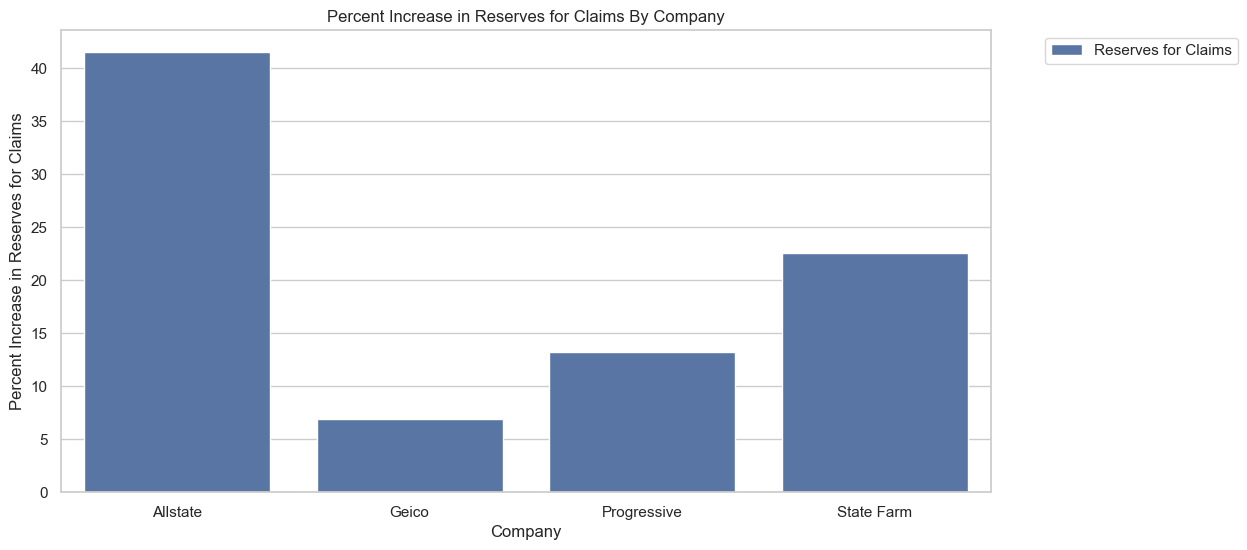

In [18]:
df_melted4 = pd.melt(df1, id_vars=['Company', 'Year'], value_vars=['Reserves for Claims'])
df_melted4['Percent Increase RFC 1'] = df_melted4.groupby(['Company', 'variable'])['value'].pct_change() * 100
df_melted4['Percent Increase RFC 2'] = df_melted4.groupby(['Company', 'variable'])['Percent Increase RFC 1'].bfill()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x="Company", y="Percent Increase RFC 1", hue="variable", data=df_melted4, errorbar=None)
plt.xlabel('Company')
plt.ylabel('Percent Increase in Reserves for Claims')
plt.title('Percent Increase in Reserves for Claims By Company')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

**Results**
- Claims reserves are an essential indicator of a company's expectations of the value of future premiums
- Allstate has increased their claims reserves by more than 40%, signaling preparation for a large increase in amount of claims in the next coming year; this foresight is most likely the cause of their drop in underwriting profits as well as State Farm's.
- State Farm, Progressive and Geico have kept their reserves moderate; they are most likely content with their business strategies and their premium price.

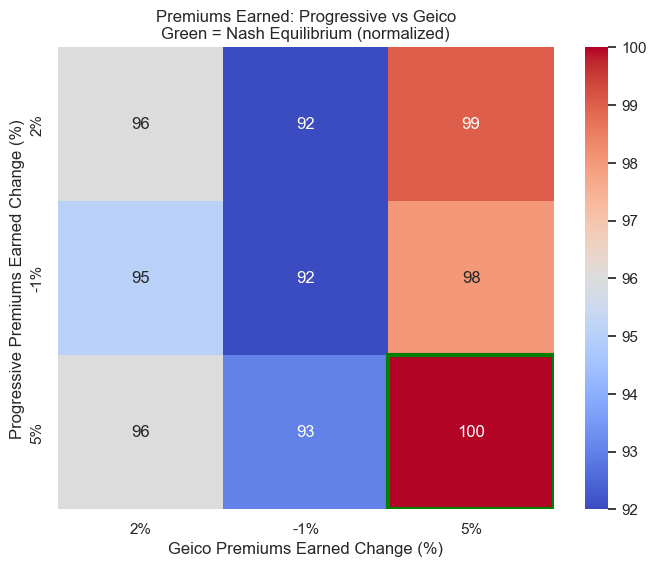

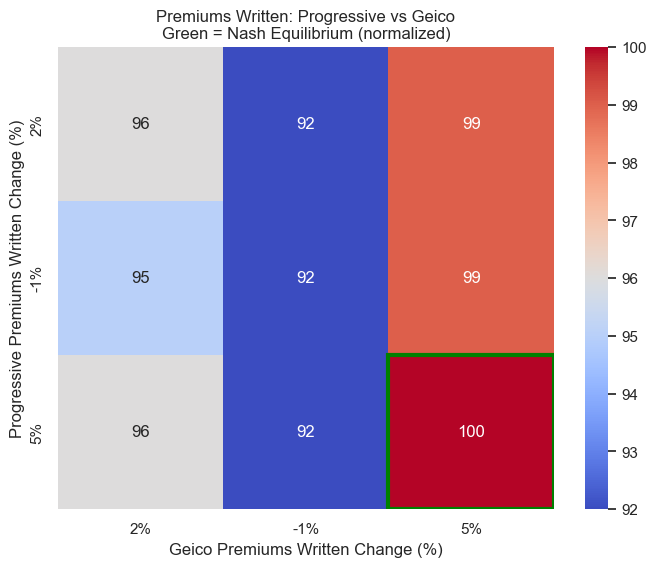

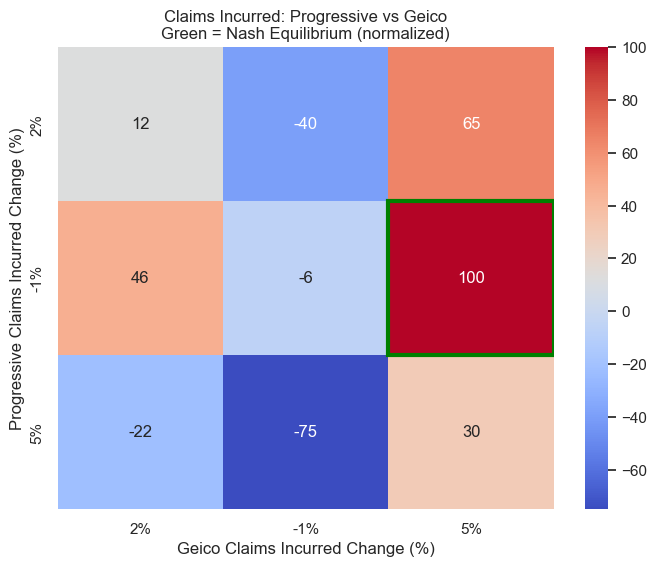

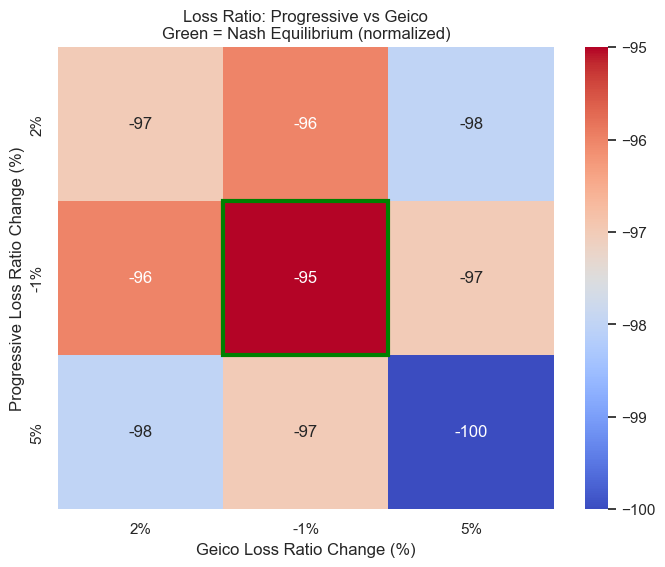

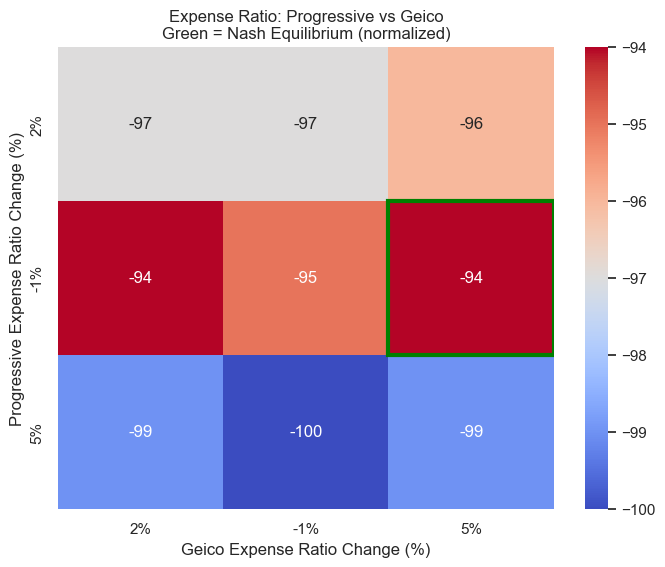

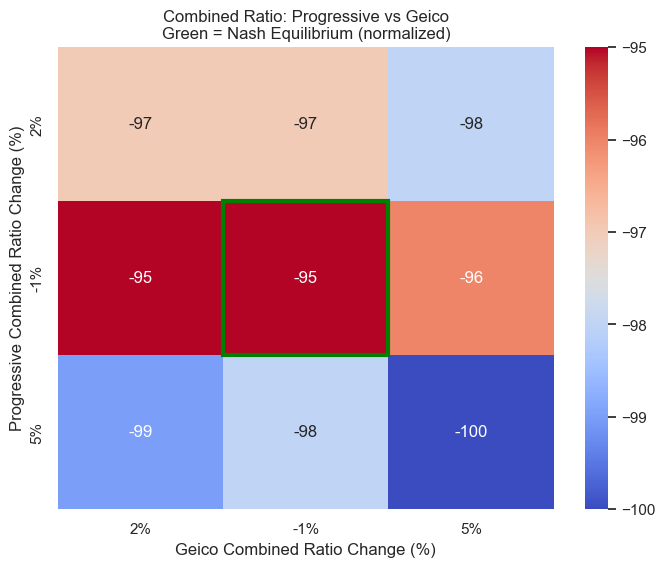

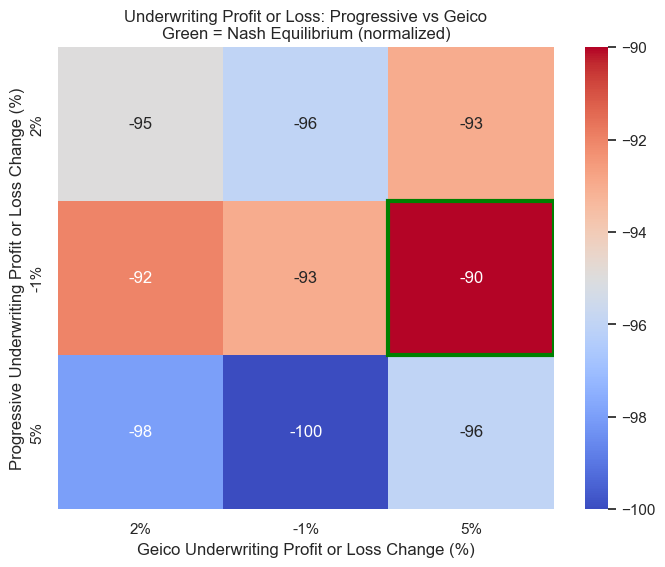

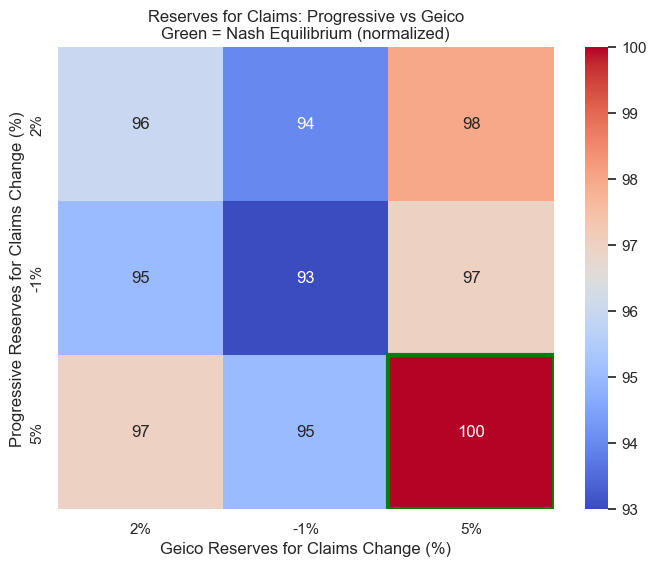

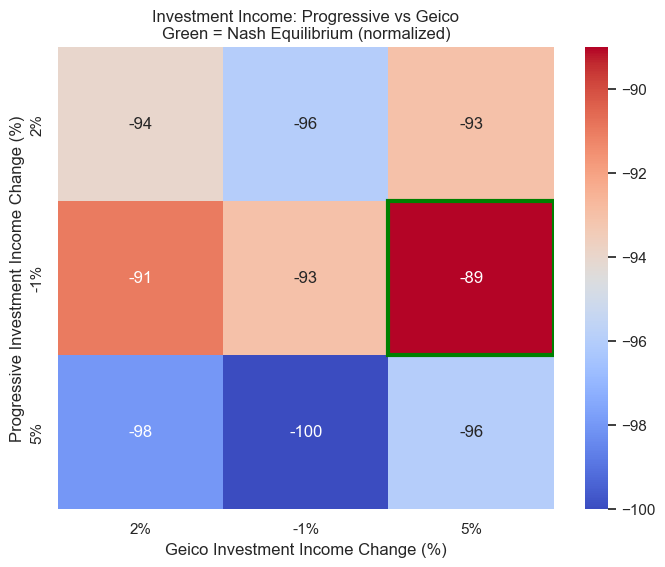

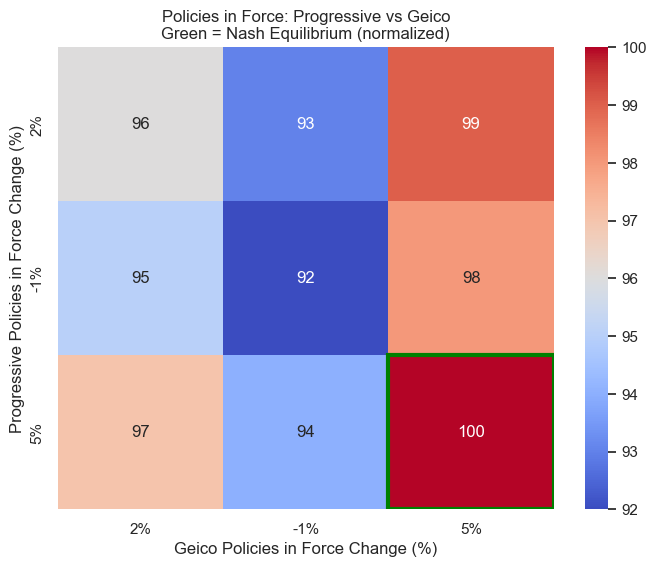

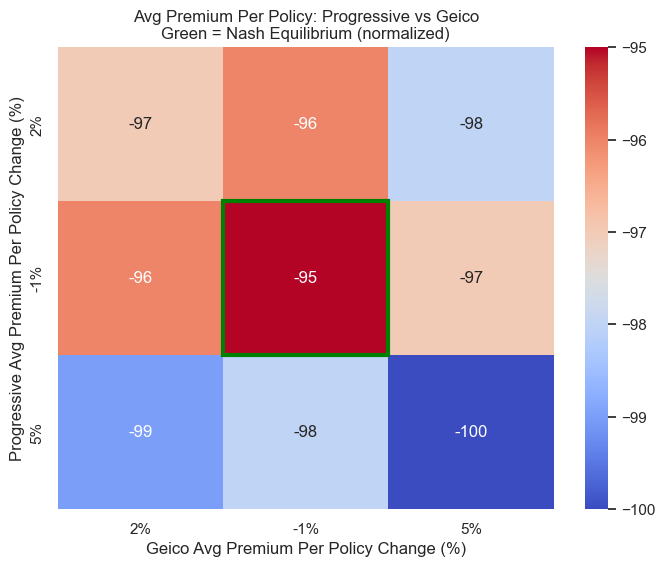

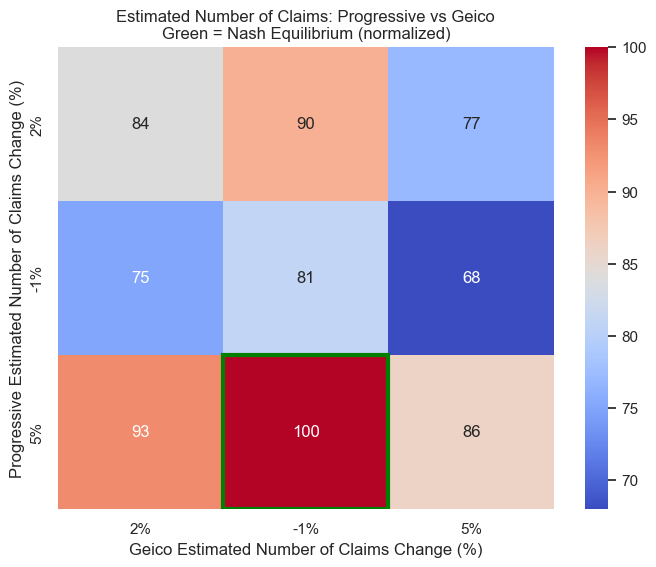

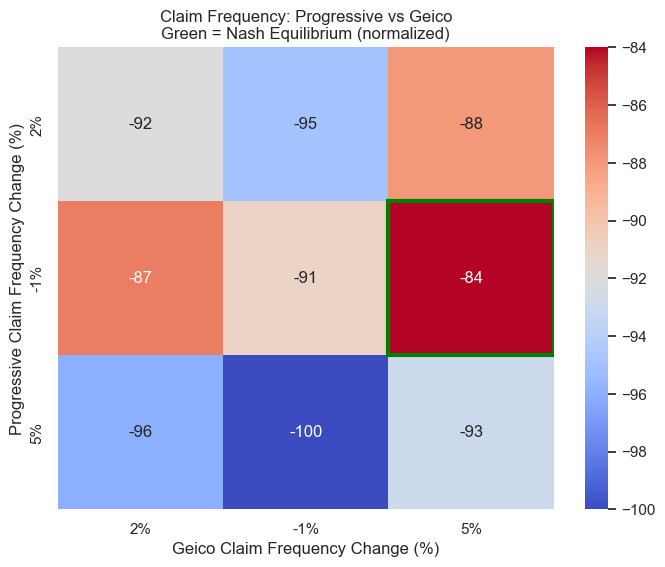

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_normalized = df1.copy()
df_normalized = df_normalized.rename(columns={
    'Lognormal Estimated # of Claims Using Severity Range 3-10': 'Estimated Number of Claims'})

categories = ['Premiums Earned', 'Premiums Written', 'Claims Incurred', 'Loss Ratio', 
              'Expense Ratio', 'Combined Ratio', 'Underwriting Profit or Loss', 
              'Reserves for Claims', 'Investment Income', 'Policies in Force', 
              'Avg Premium Per Policy', 'Estimated Number of Claims', 
              'Claim Frequency']

companies = df1['Company'].unique()
num_companies = len(companies)

for column in df1.columns[1:]:
    df_normalized[column] = (df1[column] - df1[column].mean()) / df1[column].std()

premium_changes = np.array([0.02, -0.01, 0.05])  # company A and B will each iterate independently
claim_changes = np.array([0.01, -0.03, 0.02])

payoff_matrices = {}

for category in categories:
    payoff_matrices[category] = {}
    
    for i, company_a in enumerate(companies):
        company_a_data = df_normalized[df_normalized['Company'] == company_a].iloc[0]
        payoff_matrices[category][company_a] = {}
        
        for j, company_b in enumerate(companies):
            if i == j:
                continue
            company_b_data = df_normalized[df_normalized['Company'] == company_b].iloc[0]
            payoff_matrix = np.zeros((len(premium_changes), len(premium_changes)))  # rows=A, cols=B
            
            # Independent strategies for premium
            for row, premium_change_a in enumerate(premium_changes):
                for col, premium_change_b in enumerate(premium_changes):
                    total_payoff_a = 0
                    for claim_change in claim_changes:  # aggregate over claim scenarios
                        adjusted_premium_a = company_a_data[category] * (1 + premium_change_a)
                        adjusted_claim_a   = company_a_data['Claims Incurred'] * (1 + claim_change)

                        adjusted_premium_b = company_b_data[category] * (1 + premium_change_b)
                        adjusted_claim_b   = company_b_data['Claims Incurred'] * (1 + claim_change)

                        payoff_a = adjusted_premium_a - adjusted_claim_a
                        payoff_b = adjusted_premium_b - adjusted_claim_b

                        total_payoff_a += payoff_a - payoff_b  # aggregate across claim scenarios
                    
                    payoff_matrix[row, col] = total_payoff_a / len(claim_changes)  # average

            payoff_matrices[category][company_a][company_b] = payoff_matrix

def find_nash_indices(matrix):
    equilibria = []
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i, j] >= np.max(matrix[i, :]) and matrix[i, j] >= np.max(matrix[:, j]):
                equilibria.append((i, j))
    return equilibria

def plot_payoff_matrix(matrix, company_a, company_b, category):
    max_val = np.max(np.abs(matrix))
    normalized_matrix = (matrix / max_val) * 100 if max_val != 0 else matrix
    int_matrix = normalized_matrix.astype(int)
    equilibria = find_nash_indices(matrix)
    
    plt.figure(figsize=(8,6))
    ax = sns.heatmap(int_matrix, annot=True, fmt="d", cmap="coolwarm",
                     xticklabels=[f"{c*100:.0f}%" for c in premium_changes],  # competitor
                     yticklabels=[f"{c*100:.0f}%" for c in premium_changes])  # Progressive

    for eq in equilibria:
        ax.add_patch(plt.Rectangle((eq[1], eq[0]), 1, 1, fill=False, edgecolor='green', lw=3))
    
    plt.title(f"{category}: {company_a} vs {company_b}\nGreen = Nash Equilibrium (normalized)")
    plt.xlabel(f"{company_b} {category} Change (%)")  # X-axis = competitor & category
    plt.ylabel(f"{company_a} {category} Change (%)")  # Y-axis = company & category
    plt.show()
    plt.show()

for category in categories:
    plot_payoff_matrix(payoff_matrices[category]['Progressive']['Geico'], 
                       'Progressive', 'Geico', category)


**Payoff Matrix Heatmaps**
- These heatmaps show the expected payoff for Progressive against a competitor across all possible premium strategies.
- The Nash equilibrium is outlined in green and represents a stable strategy: given the competitor’s optimal choice, neither company can improve its payoff by changing strategy alone.
- The heatmap visually shows how a company should adjust its premiums to maximize relative payoff in response to competitor actions.
- Colors indicate the magnitude of advantage: red = favorable payoff, blue = unfavorable payoff.

**Understanding the Payoff Matrix Heatmaps**
(Using Premiums Earned: Progressive vs Geico Payoff Matrix Heatmap)
- Top left (96, gray): Both Progressive and Geico keep premiums low. Progressive does reasonably well.
- Top middle (92, blue): Progressive keeps premiums low, but Geico chooses moderate premiums. Progressive’s relative payoff drops slightly.
- Top right (99, red): Progressive keeps premiums low, Geico hikes premiums high. Progressive benefits slightly due to conservative positioning.
- Middle row (Progressive moderate): Progressive’s moderate premiums give stable payoffs across all Geico strategies. The heatmap colors (light blue, blue, hot pink) indicate payoffs are competitive but not extreme.
- Bottom row (Progressive high premiums): When Progressive raises premiums high (+5%), the payoff is highest (100, red) if Geico also chooses high premiums. If Geico keeps premiums low, Progressive’s relative gain is smaller (96, gray).